In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyedflib matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.4 MB/s eta 0:00:00


In [3]:
!pip install mne pyedflib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.8 MB/s eta 0:00:00


In [4]:
# Step 3: Import necessary libraries
import os
import pandas as pd
import mne
import pyedflib
import matplotlib.pyplot as plt
import numpy as np

# LOADING FILES

In [ ]:
# Step 4: Define the base directory and load the subjects file
base_dir = '/content/drive/MyDrive/Sleep-EDF Database Expanded - SC/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette'
subjects_file = os.path.join(base_dir, 'SC-subjects.xls')
subjects_df = pd.read_excel(subjects_file)

In [5]:
def get_file_paths(subject, night):
    base_dir = '/content/drive/MyDrive/Sleep-EDF Database Expanded - SC/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette'
    subject_str = f"{subject:02d}"  # Ensure subject number is two digits
    psg_pattern = os.path.join(base_dir, f"SC4{subject_str}{night}*-PSG.edf")
    hypnogram_pattern = os.path.join(base_dir, f"SC4{subject_str}{night}*-Hypnogram.edf")

    psg_file = None
    hypnogram_file = None

    files = os.listdir(base_dir)
    for file in files:
        if file.endswith('-PSG.edf') and file.startswith(f"SC4{subject_str}{night}"):
            psg_file = os.path.join(base_dir, file)
        if file.endswith('-Hypnogram.edf') and file.startswith(f"SC4{subject_str}{night}"):
            hypnogram_file = os.path.join(base_dir, file)

    return psg_file, hypnogram_file

def load_edf_files(subject, night):
    psg_file, hypnogram_file = get_file_paths(subject, night)

    if psg_file is None or hypnogram_file is None:
        raise FileNotFoundError(f"Files not found for subject {subject}, night {night}")

    psg = pyedflib.EdfReader(psg_file)
    hypnogram = pyedflib.EdfReader(hypnogram_file)

    return psg, hypnogram

# PLOTTING PSG AND HYPNOGRAM

In [6]:
def plot_data(psg, hypnogram):
    # Example: Reading signals from PSG
    num_signals = psg.signals_in_file
    print(f"Number of signals in PSG: {num_signals}")

    # Example: Reading annotations from Hypnogram
    annotations = hypnogram.readAnnotations()
    print(f"Annotations: {annotations}")

    # Example: Reading signals from PSG
    signal = psg.readSignal(0)  # Read first signal

    # Example: Plotting PSG signal
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(signal, label='Signal')
    plt.title('PSG Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plotting Hypnogram (sleep stages)
    plt.subplot(2, 1, 2)
    # Hypnogram data and plot
    annotations = hypnogram.readAnnotations()
    stages = annotations[2]
    starts = annotations[0]
    ends = annotations[1]

    # Iterate through annotations to plot sleep stages
    for i in range(len(stages)):
        # Ensure not to go out of bounds
        if i < len(starts) - 1:
            plt.plot([starts[i], starts[i+1]], [stages[i], stages[i]], color='blue')

    plt.title('Hypnogram (Sleep Stages)')
    plt.xlabel('Time')
    plt.ylabel('Stage')
    plt.yticks([0, 1, 2, 3, 4], ['Undefined', 'Wake', 'NREM', 'REM', 'Movement'])
    plt.ylim(-0.5, 4.5)
    plt.tight_layout()
    plt.show()

    # Close EDF files
    psg.close()
    hypnogram.close()


Number of signals in PSG: 7
Annotations: (array([    0., 27390., 27540., 29850., 29910., 31650., 31830., 32820.,
       32910., 33000., 34020., 34110., 34170., 35370., 35400., 35490.,
       35520., 35820., 35910., 35970., 36930., 38160., 38190., 38310.,
       38730., 39060., 39180., 39870., 40020., 40230., 40260., 42060.,
       42150., 44340., 44370., 45120., 45210., 45240., 45300., 45330.,
       45360., 45390., 45600., 45630., 46050., 46170., 46200., 46230.,
       46260., 46350., 46380., 46680., 46710., 46860., 46980., 47010.,
       47340., 47610., 47730., 47790., 47820., 47850., 47970., 48060.,
       48180., 48330., 48360., 48840., 48870., 48900., 48930., 49020.,
       50100., 50130., 50190., 50220., 50250., 50310., 50340., 50460.,
       51270., 51330., 51630., 53250., 53280., 54180., 54690., 55050.,
       55080., 55560., 55710., 78900.]), array([27390.,   150.,  2310.,    60.,  1740.,   180.,   990.,    90.,
          90.,  1020.,    90.,    60.,  1200.,    30.,    90.,   

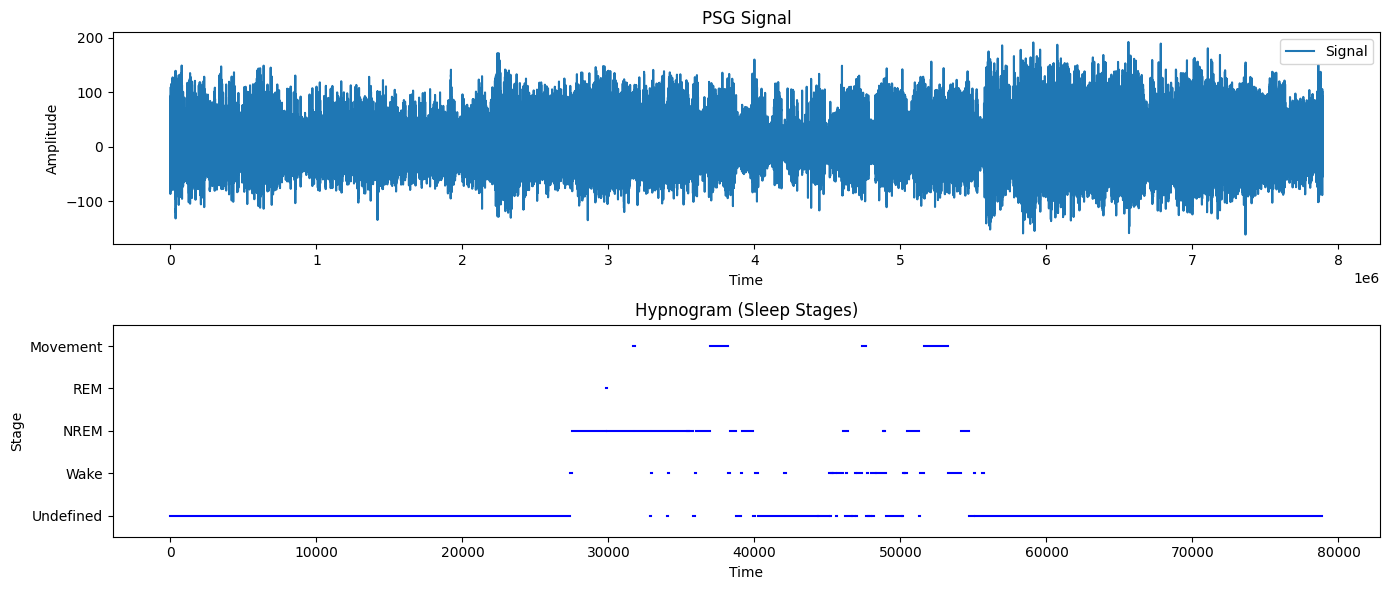

In [ ]:
# subject = 40  # Replace with desired subject number
# night = 1     # Replace with desired night number

# try:
#     # Load PSG and Hypnogram files
#     psg, hypnogram = load_edf_files(subject, night)

#     # Plot data
#     plot_data(psg, hypnogram)

# except FileNotFoundError as e:
#     print(e)
# except Exception as e:
#     print(f"An error occurred: {e}")


In [ ]:
def plot_psg_with_sleep_stages(psg, hypnogram):
    # Read PSG signal
    signal = psg.readSignal(0)  # Read first signal
    fs = psg.getSampleFrequency(0)  # Sampling frequency

    # Read Hypnogram annotations
    annotations = hypnogram.readAnnotations()
    stages = annotations[2]  # Sleep stages
    starts = annotations[0]   # Start times

    # Determine unique sleep stages and assign colors
    unique_stages = np.unique(stages)
    stage_colors = {
        'Sleep stage W': 'blue',
        'Sleep stage 1': 'orange',
        'Sleep stage 2': 'green',
        'Sleep stage 3': 'red',
        'Sleep stage 4': 'purple',
        'Sleep stage R': 'brown',
        'Movement': 'gray',
        'Sleep stage ?': 'black'
    }

    # Plotting PSG signal with colored segments for each sleep stage
    plt.figure(figsize=(14, 6))

    # Plot PSG signal with colored segments based on sleep stage
    for i in range(len(starts) - 1):
        start_index = int(starts[i] * fs)
        end_index = int(starts[i+1] * fs)
        segment = signal[start_index:end_index]
        stage = stages[i]
        color = stage_colors.get(stage, 'black')
        plt.plot(np.arange(len(segment)) / fs + starts[i], segment, color=color, label=stage)

    # Add legend with stage colors
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in stage_colors.values()]
    plt.legend(handles, stage_colors.keys(), loc='upper right', fontsize='small')

    plt.title('PSG Signal with Sleep Stages')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.ylim(signal.min() - 50, signal.max() + 50)  # Adjust y-axis limits for better visualization
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Close EDF files using context managers
    with psg, hypnogram:
        pass

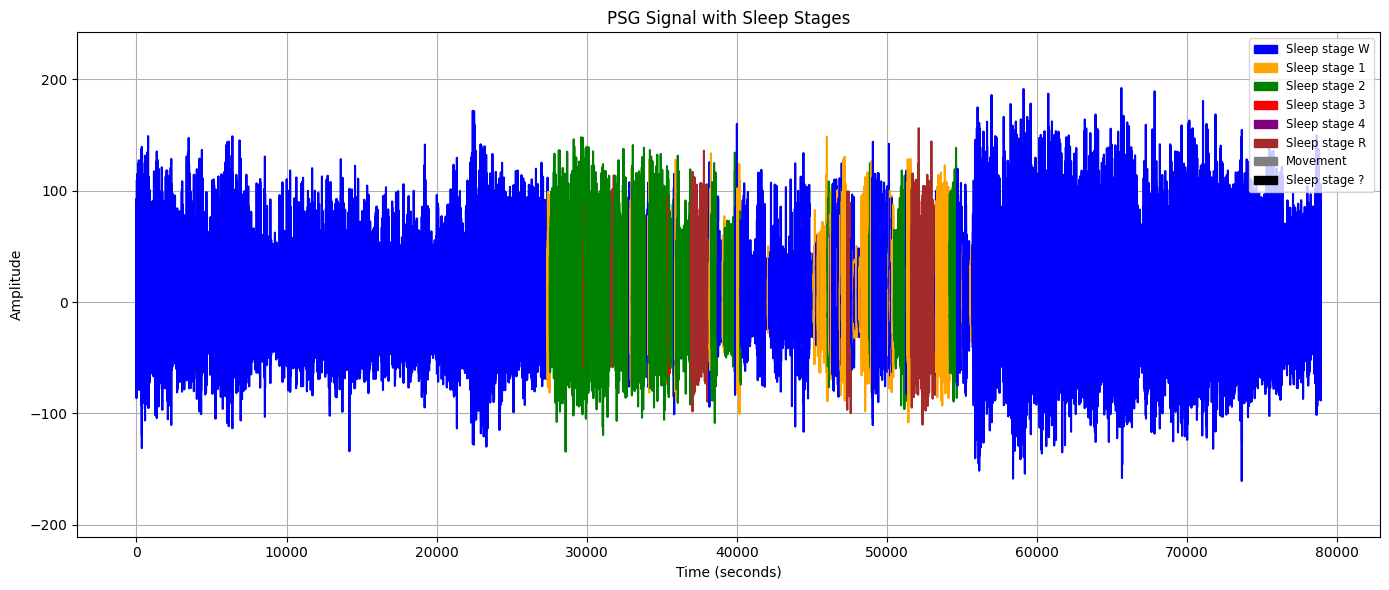

In [ ]:
# Example usage:
subject = 40  # Replace with desired subject number
night = 1     # Replace with desired night number

try:
    # Load PSG and Hypnogram files
    psg, hypnogram = load_edf_files(subject, night)

    # Plot PSG signal with sleep stages
    plot_psg_with_sleep_stages(psg, hypnogram)

except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")

# DATA PREPROCESSING


*   divide into 30 sec epochs
*   undersampling to balance data



In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the sleep stages we are interested in, without merging
sleep_stage_mapping = {
    'Sleep stage W': 0,  # Wake
    'Sleep stage 1': 1,  # NREM Stage 1
    'Sleep stage 2': 2,  # NREM Stage 2
    'Sleep stage 3': 3,  # NREM Stage 3
    'Sleep stage 4': 4,  # NREM Stage 4
    'Sleep stage R': 5,  # REM
    'Movement': -1,      # Ignore
    'Sleep stage ?': -1  # Ignore
}

def preprocess_data(psg, hypnogram):
    signal = psg.readSignal(0)  # Read first signal
    fs = psg.getSampleFrequency(0)  # Sampling frequency

    annotations = hypnogram.readAnnotations()
    stages = annotations[2]  # Sleep stages
    starts = annotations[0]  # Start times

    epoch_length = 30  # seconds
    epoch_samples = int(epoch_length * fs)

    # Segment signals into 30-second epochs
    epochs = []
    epoch_labels = []

    for i in range(len(starts) - 1):
        start_time = starts[i]
        stage = stages[i]

        if stage in sleep_stage_mapping and sleep_stage_mapping[stage] != -1:
            start_index = int(start_time * fs)
            end_index = start_index + epoch_samples

            if end_index < len(signal):
                epoch = signal[start_index:end_index]
                epochs.append(epoch)
                epoch_labels.append(sleep_stage_mapping[stage])

    # Convert to numpy arrays
    epochs = np.array(epochs)
    epoch_labels = np.array(epoch_labels)

    return epochs, epoch_labels

def balance_classes(epochs, epoch_labels):
    class_indices = {label: np.where(epoch_labels == label)[0] for label in np.unique(epoch_labels)}

    min_class_size = min(len(indices) for indices in class_indices.values())

    balanced_indices = []
    for indices in class_indices.values():
        balanced_indices.extend(np.random.choice(indices, min_class_size, replace=False))

    balanced_epochs = epochs[balanced_indices]
    balanced_labels = epoch_labels[balanced_indices]

    return balanced_epochs, balanced_labels

import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    unique_labels = [str(int(label)) for label in unique]  # Convert to string for tick_label
    plt.figure(figsize=(10, 5))
    bars = plt.bar(unique, counts, tick_label=unique_labels)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Counts')

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

    plt.show()

In [ ]:

# subject = 11  # Replace with desired subject number
# night = 2  # Replace with desired night number

# try:
#     # Load PSG and Hypnogram files
#     psg, hypnogram = load_edf_files(subject, night)

#     # Preprocess data
#     epochs, epoch_labels = preprocess_data(psg, hypnogram)

#     # Balance classes
#     balanced_epochs, balanced_labels = balance_classes(epochs, epoch_labels)

#     # Plot class distributions
#     plot_class_distribution(epoch_labels, 'Original Class Distribution')
#     plot_class_distribution(balanced_labels, 'Balanced Class Distribution')

#     print('Preprocessing completed successfully.')

#     # Close EDF files
#     psg.close()
#     hypnogram.close()

# except FileNotFoundError as e:
#     print(e)
# except Exception as e:
#     print(f"An error occurred: {e}")


# FEATURE EXTRACTION


*   EEMD to extract 7 IMFS
*   Compute feaures of each IMF



In [ ]:
!pip install PyEMD

In [ ]:
!pip install EMD-signal

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from PyEMD import EEMD

In [ ]:
# Feature extraction using EEMD
def compute_features(imf):
    mean = np.mean(imf)
    variance = np.var(imf)
    skewness = skew(imf)
    kurt = kurtosis(imf)
    rms = np.sqrt(np.mean(imf**2))
    std_dev = np.std(imf)
    crest_factor = np.max(np.abs(imf)) / rms

    return [
        mean, variance, skewness, kurt, rms, std_dev,
        crest_factor
    ]

def extract_features_from_epochs(epochs, labels, target_label):
    eemd = EEMD()
    num_imfs = 7  # Number of IMFs to extract
    all_features = []
    cnt = 0

    for epoch, label in zip(epochs, labels):
        if label == target_label:
            imfs = eemd.eemd(epoch, max_imf=num_imfs)
            epoch_features = []

            for imf in imfs:
                imf_features = compute_features(imf)
                epoch_features.extend(imf_features)

            all_features.append(epoch_features)
            cnt += 1
            print(cnt)

    print(f"Extracted features for {cnt} instances with label {target_label}")
    return np.array(all_features)

# PREPROCESSING AND FEATURE EXTRACTION ON DATASET

### PREPROCESSING (30S EPOCH)

In [ ]:
# Initialize lists to aggregate all epochs and labels
all_epochs = []
all_labels = []

# Iterate through subjects_df to get all subjects and nights
for index, row in subjects_df.iterrows():
    subject = row['subject']
    nights = [1, 2]  # Assuming there are two nights per subject

    for night in nights:
        try:
            # Load the PSG and Hypnogram EDF files
            psg, hypnogram = load_edf_files(subject, night)

            # Preprocess data to get epochs and epoch_labels
            epochs, epoch_labels = preprocess_data(psg, hypnogram)

            # Append to all_epochs and all_labels
            all_epochs.extend(epochs)
            all_labels.extend(epoch_labels)

        except FileNotFoundError:
            print(f"Files not found for subject {subject}, night {night}")
            continue

# Convert lists to numpy arrays
all_epochs = np.array(all_epochs)
all_labels = np.array(all_labels)

### BALANCING BY RANDOM SAMPLING

In [ ]:
# Balance the classes for all data
balanced_epochs, balanced_labels = balance_classes(all_epochs, all_labels)

### FEATURE EXTRACTION LABEL-WISE

In [ ]:
# Extract features labels 0 to 5
features_df = pd.DataFrame()

for i in range(6):
  features = extract_features_from_epochs(balanced_epochs, balanced_labels, target_label)
  f_df = pd.DataFrame(features)
  features_df = features_df.append(f_df, ignore_index=True)

labels_df = pd.DataFrame(balanced_labels, columns=['Label'])

# Combine features and labels
final_df = pd.concat([features_df, labels_df], axis=1)

In [ ]:
import os

# Define the file path for saving the final DataFrame as CSV
csv_file_path = os.path.join(base_dir, 'final_df.csv')

# Save the DataFrame to a new CSV file
final_df.to_csv(csv_file_path, index=False)
print(f"DataFrame saved to {csv_file_path}")

# FINDING THRESHOLD FOR ADJACENCY MATRIX

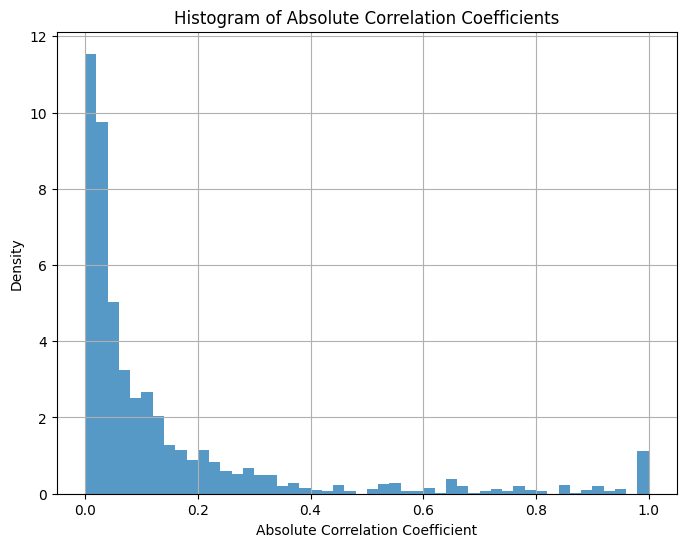

Estimated Optimal Threshold: 0.9600003197066282


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Dropout, MultiHeadAttention, LayerNormalization, Concatenate, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from spektral.layers import GCNConv
from spektral.utils import normalized_adjacency
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the final_df from CSV
final_df = pd.read_csv('/content/drive/MyDrive/Sleep-EDF Database Expanded - SC/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/sample_final.csv')

# Separate features and labels
X = final_df.drop(columns=['Label']).values
y = final_df['Label'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to estimate optimal threshold based on correlation matrix
def estimate_optimal_threshold(features):
    # Calculate correlation matrix
    corr_matrix = np.corrcoef(features, rowvar=False)

    # Flatten and get absolute values of correlation coefficients
    abs_corr = np.abs(corr_matrix).flatten()

    # Plot histogram of absolute correlation coefficients
    plt.figure(figsize=(8, 6))
    plt.hist(abs_corr, bins=50, density=True, alpha=0.75)
    plt.xlabel('Absolute Correlation Coefficient')
    plt.ylabel('Density')
    plt.title('Histogram of Absolute Correlation Coefficients')
    plt.grid(True)
    plt.show()

    # Estimate optimal threshold using elbow method or percentile
    # For example, finding a threshold where the histogram distribution drops off

    # Calculate histogram
    hist, bins = np.histogram(abs_corr, bins=50, density=True)

    # Find the index where histogram starts to drop off significantly (elbow point)
    elbow_index = np.argmax(np.diff(hist))  # Finding the peak of the first derivative
    optimal_threshold = bins[elbow_index]

    return optimal_threshold

# Example usage
optimal_threshold = estimate_optimal_threshold(X_train)

print(f"Estimated Optimal Threshold: {optimal_threshold}")

# BiLSTM + GCN FINAL

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56)]              0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 56, 1)             0         
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 56, 128)           33792     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 56, 128)           512       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 56, 128)           98816     
 onal)                                                       

Epoch 1/200
302/302 [==============================] - 88s 220ms/step - loss: 1.4381 - accuracy: 0.4168 - val_loss: 1.5164 - val_accuracy: 0.3349
Epoch 2/200
302/302 [==============================] - 59s 197ms/step - loss: 1.2035 - accuracy: 0.5011 - val_loss: 1.1956 - val_accuracy: 0.5191
Epoch 3/200
302/302 [==============================] - 57s 190ms/step - loss: 1.1502 - accuracy: 0.5212 - val_loss: 1.0686 - val_accuracy: 0.5714
Epoch 4/200
302/302 [==============================] - 58s 191ms/step - loss: 1.1159 - accuracy: 0.5349 - val_loss: 1.0160 - val_accuracy: 0.5946
Epoch 5/200
302/302 [==============================] - 60s 197ms/step - loss: 1.0834 - accuracy: 0.5472 - val_loss: 1.0537 - val_accuracy: 0.5639
Epoch 6/200
302/302 [==============================] - 58s 192ms/step - loss: 1.0505 - accuracy: 0.5647 - val_loss: 1.0157 - val_accuracy: 0.6004
Epoch 7/200
302/302 [==============================] - 61s 201ms/step - loss: 1.0503 - accuracy: 0.5624 - val_loss: 0.9841 -

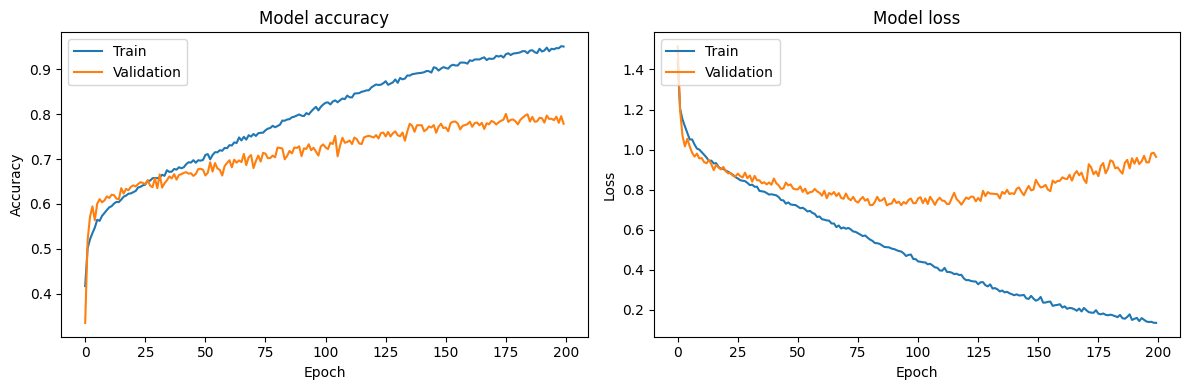

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from spektral.layers import GCNConv, GlobalMaxPool
from spektral.utils import normalized_adjacency
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the final_df from CSV
final_df = pd.read_csv('/content/drive/MyDrive/Sleep-EDF Database Expanded - SC/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/sample_final3.csv')

# Separate features and labels
X = final_df.drop(columns=['Label']).values
y = final_df['Label'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare adjacency matrix for GCN based on feature correlations
def create_adjacency_matrix(X, threshold=0.96):
    corr_matrix = np.corrcoef(X.T)
    adj_matrix = (np.abs(corr_matrix) > threshold).astype(int)
    np.fill_diagonal(adj_matrix, 0)
    return normalized_adjacency(adj_matrix)

num_features = X_train.shape[1]
adj_matrix = create_adjacency_matrix(X)

# Define the revised model
def build_model(input_shape, adj_matrix):
    inputs = Input(shape=input_shape)
    x = tf.expand_dims(inputs, axis=-1)

    # LSTM Block
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.UpSampling1D(size=2)(x)

    # Single GCN Layer with dropout
    gcn = GCNConv(64, activation='relu')([x, adj_matrix])
    gcn = Dropout(0.3)(gcn)

    # Global Pooling
    gcn_pooled = GlobalMaxPool()(gcn)

    # Fully Connected Layer
    x = Dense(64, activation='relu')(gcn_pooled)
    x = Dropout(0.5)(x)

    # Output layer with 6 units for 6 classes (sleep stages)
    outputs = Dense(6, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_model((num_features,), adj_matrix)

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    'model_epoch_{epoch:02d}.h5',
    save_weights_only=True,
    save_best_only=False,
    period=1
)

# Train the model with checkpointing
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [ ]:
# Function to load model from a specific epoch and evaluate it
def load_and_evaluate(epoch, test_csv_path):
    # Load the model weights from the specified epoch
    model_file = f'model_epoch_{epoch:02d}.h5'
    try:
        model.load_weights(model_file)

        # Load the test data
        test_df = pd.read_csv(test_csv_path)
        X_test = test_df.drop(columns=['Label']).values
        y_test = test_df['Label'].values

        # Prepare the adjacency matrix for GCN
        adj_matrix = create_adjacency_matrix(X_test)

        # Make predictions and evaluate
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Loss for epoch {epoch}: {test_loss}')
        print(f'Test Accuracy for epoch {epoch}: {test_accuracy}')
    except Exception as e:
        print(f"Failed to load model from epoch {epoch}: {e}")

# Path to the new test data CSV
test_csv_path = '/content/drive/MyDrive/Sleep-EDF Database Expanded - SC/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/final_df_4.csv'

# Prompt the user to enter the epoch number to evaluate
epoch_to_test = int(input('Enter the epoch number to test the model: '))
load_and_evaluate(epoch_to_test, test_csv_path)


Enter the epoch number to test the model: 161
85/85 [==============================] - 4s 42ms/step - loss: 1.2847 - accuracy: 0.6811
Test Loss for epoch 161: 1.2846546173095703
Test Accuracy for epoch 161: 0.6811110973358154


In [ ]:
from sklearn.metrics import f1_score, classification_report

# Function to load model from a specific epoch, make predictions, and calculate the F1 score
def load_and_evaluate_with_f1(epoch, test_csv_path):
    # Load the model weights from the specified epoch
    model_file = f'model_epoch_{epoch:02d}.h5'
    try:
        model.load_weights(model_file)

        # Load the test data
        test_df = pd.read_csv(test_csv_path)
        X_test = test_df.drop(columns=['Label']).values
        y_test = test_df['Label'].values

        # Prepare the adjacency matrix for GCN
        adj_matrix = create_adjacency_matrix(X_test)

        # Make predictions
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'F1 Score for epoch {epoch}: {f1}')

        # Print detailed classification report
        report = classification_report(y_test, y_pred)
        print(f'Classification Report for epoch {epoch}:\n{report}')
    except Exception as e:
        print(f"Failed to load model from epoch {epoch}: {e}")

# Prompt the user to enter the epoch number to evaluate
epoch_to_test = int(input('Enter the epoch number to test the model: '))
load_and_evaluate_with_f1(epoch_to_test, test_csv_path)


Enter the epoch number to test the model: 161
85/85 [==============================] - 6s 66ms/step
F1 Score for epoch 161: 0.6815651436356278
Classification Report for epoch 161:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       450
           1       0.51      0.51      0.51       450
           2       0.57      0.58      0.58       450
           3       0.72      0.71      0.71       450
           4       0.86      0.84      0.85       450
           5       0.69      0.71      0.70       450

    accuracy                           0.68      2700
   macro avg       0.68      0.68      0.68      2700
weighted avg       0.68      0.68      0.68      2700



In [ ]:
from sklearn.metrics import f1_score, classification_report

# Function to load model from a specific epoch, make predictions, and calculate the F1 score
def load_and_evaluate_with_f1(epoch, test_csv_path):
    # Load the model weights from the specified epoch
    model_file = f'model_epoch_{epoch:02d}.h5'
    try:
        model.load_weights(model_file)

        # Load the test data
        test_df = pd.read_csv(test_csv_path)
        X_test = test_df.drop(columns=['Label']).values
        y_test = test_df['Label'].values

        # Make predictions
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'F1 Score for epoch {epoch}: {f1}')

        # Print detailed classification report
        report = classification_report(y_test, y_pred)
        print(f'Classification Report for epoch {epoch}:\n{report}')
    except Exception as e:
        print(f"Failed to load model from epoch {epoch}: {e}")

# Path to the new test data CSV
test_csv_path = '/content/drive/MyDrive/Sleep-EDF Database Expanded - SC/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/final_df_4.csv'

# Prompt the user to enter the epoch number to evaluate
epoch_to_test = int(input('Enter the epoch number to test the model: '))
load_and_evaluate_with_f1(epoch_to_test, test_csv_path)


Enter the epoch number to test the model: 197
85/85 [==============================] - 6s 67ms/step
F1 Score for epoch 197: 0.6815555099901478
Classification Report for epoch 197:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       450
           1       0.49      0.57      0.52       450
           2       0.55      0.61      0.58       450
           3       0.73      0.70      0.71       450
           4       0.87      0.86      0.86       450
           5       0.76      0.67      0.71       450

    accuracy                           0.68      2700
   macro avg       0.69      0.68      0.68      2700
weighted avg       0.69      0.68      0.68      2700

